In [23]:
#Data Preprocessing:
#Python:Clean the data by handling missing values and correcting data types.Normalize the product categories and subcategories. Create new features such as Total Sales (Product Price * Quantity Sold) and
#Transaction Month.

import pandas as pd
df=pd.read_csv("C:\\Users\\Administrator\\Desktop\\Python\\Case Study\\sample_ecommerce_data.csv")
df.head(5)
df.isnull().sum()
df.dropna(how="any",inplace=True)
df['Transaction Date']=pd.to_datetime(df['Transaction Date'])
df['Product Category']=df['Product Category'].str.upper()
df['Product Subcategory']=df['Product Subcategory'].str.upper()
df['Product Category']=df['Product Category'].str.strip()
df['Product Subcategory']=df['Product Subcategory'].str.strip()
df['Product Category']=df['Product Category'].str.normalize('NFC')
df['Product Subcategory']=df['Product Subcategory'].str.normalize('NFC')
df=df.assign(Total_Sales = lambda x: x['Product Price'] * x['Quantity Sold'])
df.head(5)
df['Transaction Month']=df['Transaction Date'].dt.month
df.head(2)
df.to_csv("C:\\Users\\Administrator\\Desktop\\Python\\Case Study\\sample_ecommerce_data_refined.csv",index=False)

,Transaction ID,Product ID,Product Category,Product Subcategory,Product Price,Quantity Sold,Transaction Date,Customer ID,Customer Location,Payment Method,Total_Sales
0,1,151,CLOTHING,MOBILE,11.14,11,2023-02-12,1017,Florida,PayPal,122.54
1,2,192,ELECTRONICS,FICTION,237.04,10,2023-01-21,1016,New York,Debit Card,2370.40
2,3,114,BOOKS,FICTION,154.13,19,2023-11-02,1037,New York,Debit Card,2928.47
3,4,171,GROCERIES,BOARD GAME,301.19,14,2023-07-23,1013,New York,Credit Card,4216.66
4,5,160,CLOTHING,BOARD GAME,152.13,10,2022-03-19,1086,Florida,Cash,1521.30


In [71]:
#Create a database and import the cleaned dataset. Write SQL queries to validate the data and perform initial data checks.
import pandas as pd
import sqlite3
conn = sqlite3.connect('ecommerce.db')
df.to_sql('transactions', conn, if_exists='replace', index=False)
result=pd.read_sql('select * from transactions',conn)
print(result)
total_records=pd.read_sql('SELECT COUNT(*) as total_records from transactions',conn)
print(total_records)
total_null_records=pd.read_sql('SELECT COUNT(*) AS null_count FROM transactions WHERE total_sales IS NULL',conn)
print(total_null_records)

     Transaction ID  Product ID Product Category Product Subcategory  \
0                 1         151         CLOTHING              MOBILE   
1                 2         192      ELECTRONICS             FICTION   
2                 3         114            BOOKS             FICTION   
3                 4         171        GROCERIES          BOARD GAME   
4                 5         160         CLOTHING          BOARD GAME   
..              ...         ...              ...                 ...   
995             996         109             TOYS               FRUIT   
996             997         166      ELECTRONICS               PANTS   
997             998         117             TOYS         NON-FICTION   
998             999         199             TOYS              MOBILE   
999            1000         185         CLOTHING       ACTION FIGURE   

     Product Price  Quantity Sold     Transaction Date  Customer ID  \
0            11.14             11  2023-02-12 00:00:00         1

In [93]:
#Data Analysis and Visualization:
#Python:Analyze the distribution of sales across different product categories and subcategories.
category_sales=df.groupby(['Product Category','Product Subcategory'])['Total_Sales'].sum()
print(category_sales)

Product Category  Product Subcategory
BOOKS             ACTION FIGURE          49342.97
                  BOARD GAME             33337.91
                  FICTION                60744.00
                  FRUIT                  67491.16
                  LAPTOP                 65500.43
                  MOBILE                 30824.92
                  NON-FICTION            43644.10
                  PANTS                  68874.33
                  SHIRT                  76465.53
                  VEGETABLE              33737.37
CLOTHING          ACTION FIGURE          47206.34
                  BOARD GAME             52054.75
                  FICTION                34304.52
                  FRUIT                  51780.46
                  LAPTOP                 56000.25
                  MOBILE                 44811.85
                  NON-FICTION            53979.05
                  PANTS                  65939.85
                  SHIRT                  64416.73
            

In [111]:
#Identify the top 5 best-selling products and the top 5 least-selling products.
best_sell_prod=category_sales.sort_values(ascending=False)
best_sell_prod.head()
leaset_sell_prod=category_sales.sort_values(ascending=True)
leaset_sell_prod.head()

Product Category  Product Subcategory
TOYS              FRUIT                  96540.85
ELECTRONICS       ACTION FIGURE          82229.13
GROCERIES         VEGETABLE              80911.52
BOOKS             SHIRT                  76465.53
TOYS              NON-FICTION            72771.37
Name: Total_Sales, dtype: float64

In [141]:
#queries to extract insights such as top-performing products, sales trends, and customer behavior.
result=pd.read_sql('''select "Product ID","Product Category","Product Subcategory",sum(Total_Sales) as total_sale from transactions group by "Product ID","Product Category","Product Subcategory" order by total_sale''',conn)
final=result.sort_values('total_sale',ascending=False)
final.head(5)

,Product ID,Product Category,Product Subcategory,total_sale
918,132,ELECTRONICS,NON-FICTION,13421.44
917,132,BOOKS,LAPTOP,12628.16
916,106,GROCERIES,ACTION FIGURE,11768.53
915,127,BOOKS,NON-FICTION,11151.72
914,157,ELECTRONICS,NON-FICTION,10276.29


In [157]:
#Use Python classes and data structures to manage and analyze the data.
import pandas as pd
class SalesData:
    def __init__(self, file_path):
        self.file_path = file_path
        self.df = pd.read_csv(file_path)
    
    def load_data(self):     
        self.df = pd.read_csv(self.file_path)
    
    def get_top_products(self, top_n=5):
        top_products = self.df.groupby(['Product Category', 'Product Subcategory'])['Total_Sales'].sum().reset_index()
        top_products = top_products.sort_values('Total_Sales', ascending=False).head(top_n)
        return top_products
    
    def get_sales_trends(self, freq='M'):
        self.df['Transaction Date'] = pd.to_datetime(self.df['Transaction Date'])
        sales_trends = self.df.resample(freq, on='Transaction Date')['Total_Sales'].sum().reset_index()
        return sales_trends
    
    def get_customer_behavior(self):
        customer_behavior = self.df.groupby(['Customer ID']).agg(
            total_spend=('Total_Sales', 'sum'),
            number_of_purchases=('Transaction ID', 'count')
        ).reset_index()
        customer_behavior['average_order_value'] = customer_behavior['total_spend'] / customer_behavior['number_of_purchases']
        return customer_behavior.sort_values('total_spend', ascending=False)

    def get_product_performance_by_category(self):
        product_performance = self.df.groupby(['Product Category', 'Product Subcategory'])['Total_Sales'].sum().reset_index()
        return product_performance.sort_values(['Product Category', 'Total_Sales'], ascending=[True, False])

    def get_sales_by_region(self):
        sales_by_region = self.df.groupby('Customer Location')['Total_Sales'].sum().reset_index()
        return sales_by_region.sort_values('Total_Sales', ascending=False)

sales_data = SalesData('C:\\Users\\Administrator\\Desktop\\Python\\Case Study\\sample_ecommerce_data_refined.csv')
sales_data.load_data()
top_products = sales_data.get_top_products()
print("Top Products:\n", top_products)
sales_trends = sales_data.get_sales_trends(freq='ME')
print("\nMonthly Sales Trends:\n", sales_trends)
customer_behavior = sales_data.get_customer_behavior()
print("\nCustomer Behavior:\n", customer_behavior)
product_performance = sales_data.get_product_performance_by_category()
print("\nProduct Performance by Category:\n", product_performance)
sales_by_region = sales_data.get_sales_by_region()
print("\nSales by Region:\n", sales_by_region)


Top Products:
    Product Category Product Subcategory  Total_Sales
43             TOYS               FRUIT     96540.85
20      ELECTRONICS       ACTION FIGURE     82229.13
39        GROCERIES           VEGETABLE     80911.52
8             BOOKS               SHIRT     76465.53
46             TOYS         NON-FICTION     72771.37

Monthly Sales Trends:
    Transaction Date  Total_Sales
0        2022-01-31     99770.08
1        2022-02-28     80297.74
2        2022-03-31    109891.83
3        2022-04-30    131954.46
4        2022-05-31     94692.00
5        2022-06-30    110458.64
6        2022-07-31    122582.44
7        2022-08-31     81391.65
8        2022-09-30    109349.33
9        2022-10-31    101699.22
10       2022-11-30    131337.24
11       2022-12-31    116008.18
12       2023-01-31    114310.33
13       2023-02-28     74223.92
14       2023-03-31    164604.76
15       2023-04-30     82793.23
16       2023-05-31    125085.42
17       2023-06-30    147582.56
18       2023-07

In [163]:
#Implement Python generators and iterators to handle large datasets efficiently.
import pandas as pd

def read_large_csv_in_chunks(file_path, chunksize=10000):
    for chunk in pd.read_csv(file_path, chunksize=chunksize):
        yield chunk
file_path = 'C:\\Users\\Administrator\\Desktop\\Python\\Case Study\\sample_ecommerce_data_refined.csv'
for chunk in read_large_csv_in_chunks(file_path):
    print(chunk.head())

class FileIterator:
    def __init__(self, file_path):
        self.file_path = file_path
        self.file = open(file_path, 'r')
        self.line = None
    
    def __iter__(self):
        return self
    
    def __next__(self):
        if self.line is None:
            self.line = self.file.readline()
        if self.line:
            result = self.line.strip()
            self.line = None
            return result
        else:
            self.file.close()
            raise StopIteration

file_path = 'C:\\Users\\Administrator\\Desktop\\Python\\Case Study\\sample_ecommerce_data_refined.csv'
file_iterator = FileIterator(file_path)
for line in file_iterator:
    print(line)


   Transaction ID  Product ID Product Category Product Subcategory  \
0               1         151         CLOTHING              MOBILE   
1               2         192      ELECTRONICS             FICTION   
2               3         114            BOOKS             FICTION   
3               4         171        GROCERIES          BOARD GAME   
4               5         160         CLOTHING          BOARD GAME   

   Product Price  Quantity Sold Transaction Date  Customer ID  \
0          11.14             11       2023-02-12         1017   
1         237.04             10       2023-01-21         1016   
2         154.13             19       2023-11-02         1037   
3         301.19             14       2023-07-23         1013   
4         152.13             10       2022-03-19         1086   

  Customer Location Payment Method  Total_Sales  Transaction Month  
0           Florida         PayPal       122.54                  2  
1          New York     Debit Card      2370.40   

In [ ]:
#Calculate profit margins for different products and identify the most profitable products.

#### No cost fields in the data sheet to calculate the profit margin

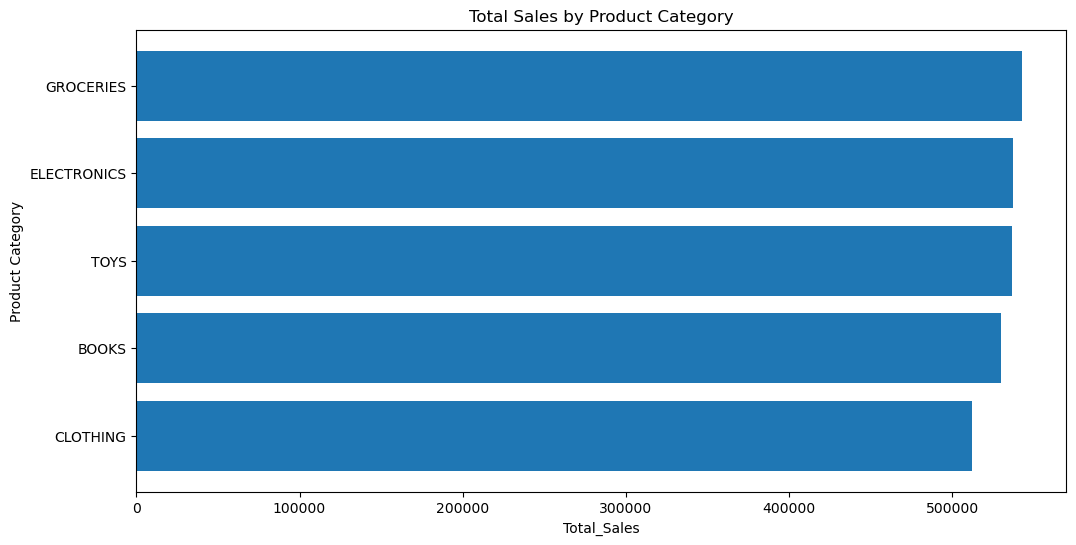

Top 5 Best-Selling Products:
Product Category
GROCERIES      542917.93
ELECTRONICS    537136.88
TOYS           536527.38
BOOKS          529962.72
CLOTHING       511989.42
Name: Total_Sales, dtype: float64
Top 5 Least-Selling Products:
Product Category
CLOTHING       511989.42
BOOKS          529962.72
TOYS           536527.38
ELECTRONICS    537136.88
GROCERIES      542917.93
Name: Total_Sales, dtype: float64


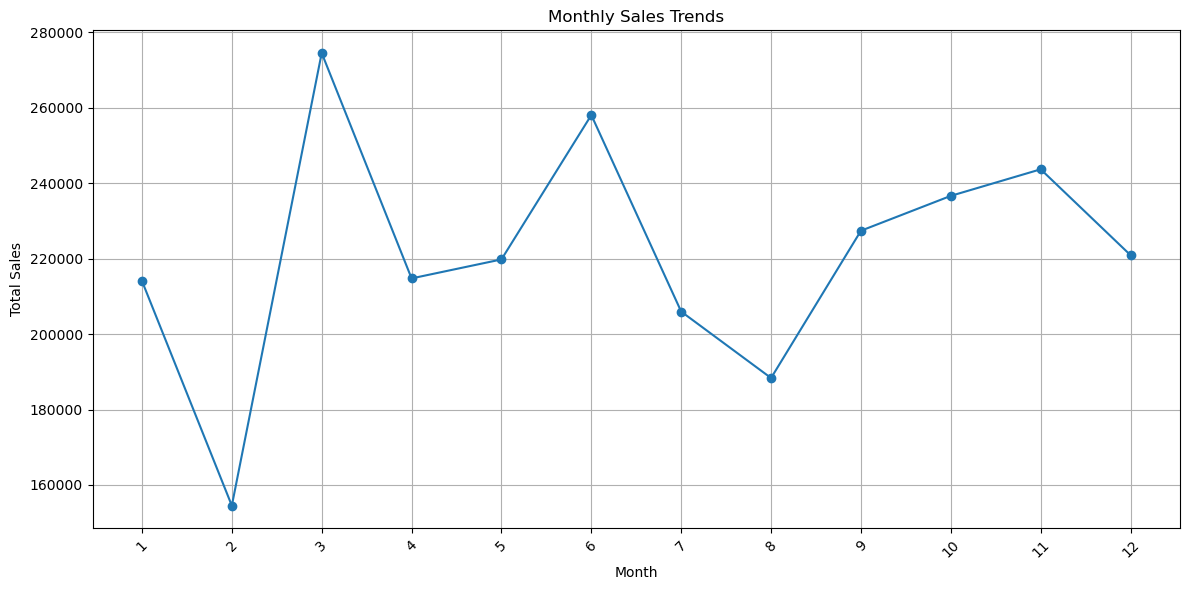

In [171]:
#Visualize the monthly sales trends and identify any seasonal patterns.

import matplotlib.pyplot as plt
category_sales = df.groupby('Product Category')['Total_Sales'].sum().sort_values()
plt.figure(figsize=(12, 6))
plt.barh(category_sales.index, category_sales.values)
plt.xlabel('Total_Sales')
plt.ylabel('Product Category')
plt.title('Total Sales by Product Category')
plt.show()
top_5_products = df.groupby('Product Category')['Total_Sales'].sum().nlargest(5)
print("Top 5 Best-Selling Products:")
print(top_5_products)


least_5_products = df.groupby('Product Category')['Total_Sales'].sum().nsmallest(5)
print("Top 5 Least-Selling Products:")
print(least_5_products)
monthly_sales = df.groupby('Transaction Month')['Total_Sales'].sum()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

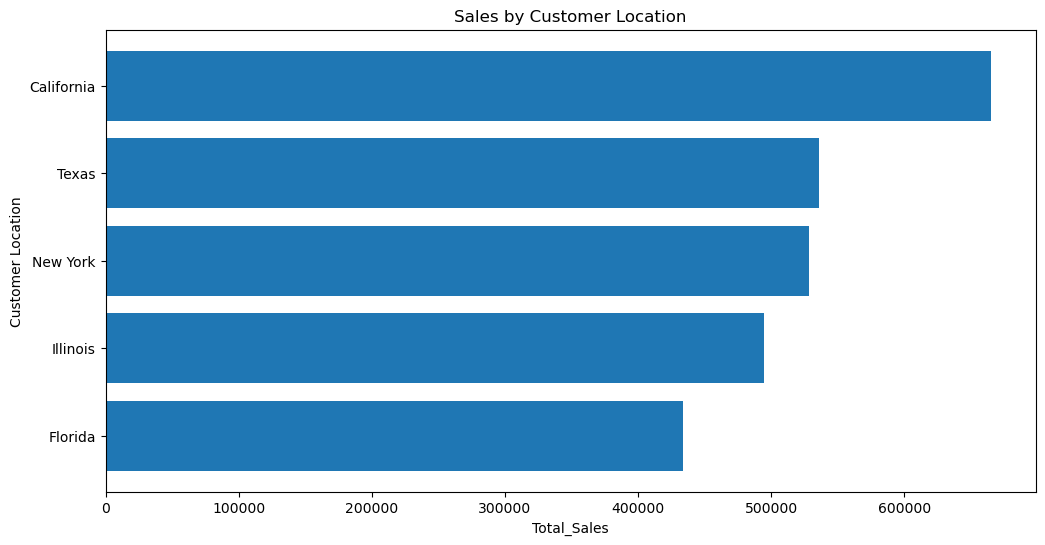

In [173]:
#Analyze customer purchasing behavior by location and payment method.

location_sales = df.groupby('Customer Location')['Total_Sales'].sum().sort_values()

plt.figure(figsize=(12, 6))
plt.barh(location_sales.index, location_sales.values)
plt.xlabel('Total_Sales')
plt.ylabel('Customer Location')
plt.title('Sales by Customer Location')
plt.show()